In [1]:
import numpy as np
import numpy.random as npr
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Histograms of Continuous Random Variables and Kernel Density Estimation

In the example of using the discrete Poisson random variable to motivate the continuous exponential random variable and in the example of modeling adult heights by a normal random variable, we saw that the histogram of data has the same shape as the pdf. However, it may not be clear **why** this is true. Let's start by creating some continuous distributions using SciPy.stats:


In [2]:
E=stats.expon()
N=stats.norm()

Here are the density functions for these random variables:

In [3]:
n=np.linspace(-5,5,101)
e=np.linspace(0,10,101)

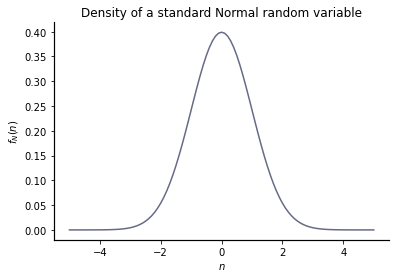

In [4]:
%matplotlib inline
plt.plot(n, N.pdf(n))
plt.title("Density of a standard Normal random variable");
plt.xlabel('$n$');
plt.ylabel('$f_N(n)$');

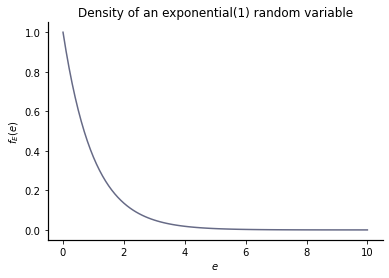

In [5]:
plt.plot(e,E.pdf(e))
plt.title("Density of an exponential(1) random variable");
plt.xlabel('$e$');
plt.ylabel('$f_E(e)$');

Now let's draw some observations from each of these random variables and try to understand how the histogram of the observations relates to the densities:

In [6]:
Evals=E.rvs(size=100)
Nvals=N.rvs(size=100)

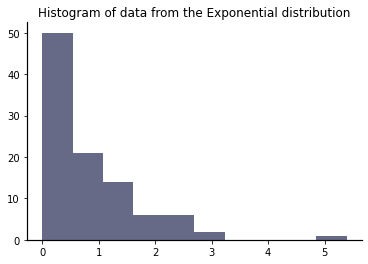

In [7]:
plt.hist(Evals)
plt.title('Histogram of data from the Exponential distribution');

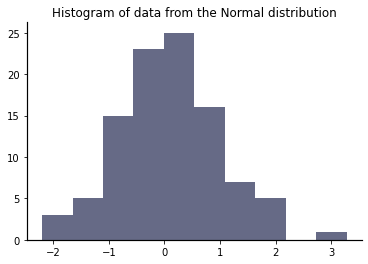

In [8]:
plt.hist(Nvals)
plt.title('Histogram of data from the Normal distribution');

The histograms have the same general shape as the densities for these random variables -- let's see why this is true. Each histogram is computed by counting the number of occurrences in a collection of $K$ bins, specified by edges $b_0, b_1, \ldots, b_K$. The counts $C_i$ is the number of occurrences in the interval 
$(b_i, b_{i+1}]$ for $i = 0, 1, \ldots, K-1$.

Let $X$ be a random variable with density $f_X(x)$. Consider a bin $(b_i,b_{i+1}]$ over which the density $f_X(x)$ is continuous and consider the probability $P_i$ that the random variable takes on a value in that interval:

\begin{align}
P_i &= P \bigl( X \in  \left(b_1,b_{i+1}\right] \bigr)\\
&= \int_{b_i}^{b_{i+1}} f_X(x)~dx.
\end{align}

Next, we will use a [Mean Value Theorem for Definite Integrals](https://en.wikipedia.org/wiki/Mean_value_theorem#Mean_value_theorems_for_definite_integrals) to simplify this expression into something we can simulate. The theorem we need says that there is $\tilde{x}_i \in (b_i, b_{i+1}]$ such that

```{math}
:label: mvt-prob
P \bigl( X \in  \left(b_i, b_{i+1}\right] \bigr) = f_X(\tilde{x}_i)(b_{i+1}-b_i).
```

I.e., the integral of the function $f_X(x)$ over an interval is equal to the area of a rectangle whose width is the length of the interval and whose height is a point within that interval. In this case, the height is the probability density of some point that lies within that bin.

**JMS: check Khan Academy Video and consider linking**

Now let's see how this relates to histograms. First, lets turn the histogram counts $\{C_i \}$ into estimates of the bin probabilities $\{P_i\}$. Let $M$ denote the total number of observations.  Then the relative frequency, $R_i$ of the event $X \in  bin $B_i$ is 


$$
 R_i = \bigl( X \in  B_i) = \frac{C_i}{M}.
$$

Now, $R_i$ is an approximation for $P_i$ as $M$ gets large. From {eq}`mvt-prob` we then have 

\begin{align*}
R_i = \frac{C_i}{M}  & \approx f_X(\tilde{x}_i)(b_{i_1} -b_i) \\
\end{align*}

```{math}
:label: pdf-est
f_X(\tilde{x}_i)  \approx \frac{C_i}{M |B_i|}
```


where $|B_i| = b_{i+1} - b_i.$ Since we are drawing a rectangle to represent the density over each bin anyways, we might as well use this density estimate as the heighr of that rectangle.


Let's test this out. Let's use bins of width 1/2. Start by creating the bin edges and collecting the counts using `plt.hist()`:

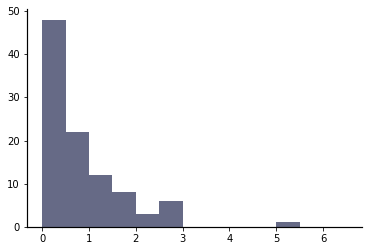

In [9]:
Ebins=np.arange(0, 7, 0.5)
(Ecounts,_,_)=plt.hist(Evals,bins=Ebins)

The probability density in each bin is given by {eq}`pdf-est`. Note that there is one more bin edge than count. We will associate the pdf height with the *left-most* bin edge, so we add one more  count of zero to the set of counts.  Then the estimated probability density values are:

In [10]:
Epdf = np.append(Ecounts,0)/np.sum(Ecounts)/(Ebins[1]-Ebins[0])

The resulting values form an estimated pdf called the *empirical pdf*. We will use the notation $\hat{f}$ (read "eff hat") to denote an empirical pdf.   A plot of the empirical pdf $\hat{f}_E(e)$ is shown below

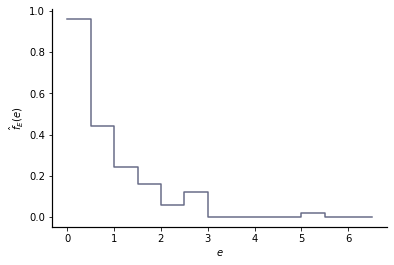

In [11]:
plt.step(Ebins, Epdf, 
         where='post')
plt.xlabel('$e$');
plt.ylabel('$\hat{f}_E(e)$');

Let's check if the empirical pdf is a valid density function. The width of each bin is 1/2, so the probability of each bin is $P_i(1/2)$. The total probability is thus 

In [12]:
np.sum(Epdf*1/2)

0.9999999999999999

Fortunately for us, we don't have to remember this formula or derive it whenever we want to create estimates of densities using a histogram from <atplotlib.

Instead just call ```plt.hist``` with the keyword argument ```density=True```

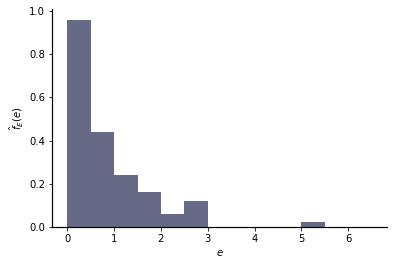

In [13]:
plt.hist(Evals, Ebins, density=True);
plt.xlabel('$e$');
plt.ylabel('$\hat{f}_E(e)$');

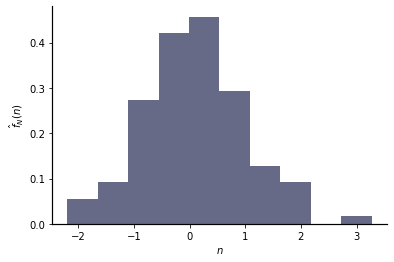

In [14]:
plt.hist(Nvals, density=True);
plt.xlabel('$n$');
plt.ylabel('$\hat{f}_N(n)$');

## Kernel Density Estimation

We have solved one of the problems in using histograms to approximate densities. But another problem remains: the blocky histogram, which is constrained to be constant over each bin, does a poor job of approximating a continuous density.

We can increase the number of bins to get a finer resolution, but then the number of observations in each bin get smaller, and the approximations for the density values may become poor:

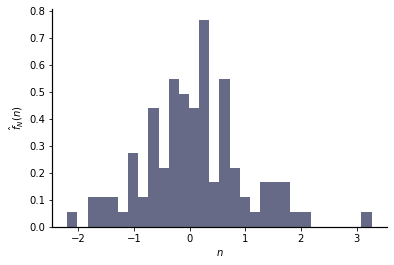

In [15]:
(counts,bins,_)=plt.hist(Nvals,bins=30, density=True);
plt.xlabel('$n$');
plt.ylabel('$\hat{f}_N(n)$');

Recall that we can build a histogram by putting a block for each observation, where the blocks are centered on the bins. 

We can use animation to visualize this better.  Because the animation is slow, let's use 40 random variables instead of 100:


In [16]:
N40=N.rvs(size=40)


Here is an aminated GIF showing a histogram of data from this distribution being created step by step:

![](figs/histogram.gif "Animated Histogram of Gaussian Data")

Now, let's consider how we could improve this. One way is to realize that we are effectively stacking probability at arbitrary bin centers.  What if we instead let each histogram block be centered on the observation value?

Blocks don't stack neatly now, so we allow each part of the block to fall to the lowest open level:

![](figs/kde_rect.gif "Animated Histogram with Blocks Centered on Observations, Gaussian Data")



This seems much closer to the true density. Here is a similar (non-animated) graph for 100 Gaussian RVs, with a finer quantization:

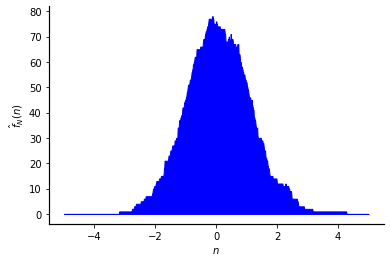

In [17]:
%matplotlib inline
x = np.linspace(-5, 5, 1000)
width=2
density=np.zeros(x.size)
for xi in Nvals:
    block=(x>xi-width/2)&(x< xi+width/2)
    density+=block
plt.fill_between(x,density, color='b', alpha=1)
plt.xlabel('$n$');
plt.ylabel('$\hat{f}_N(n)$');

This is better, but not very smooth. There is no reason to only use rectangular blocks, so let's try a smoother shape.

In the animation below, I have replaced the rectangular block with the shape of a Normal (Gaussian) pdf.  
Here is an aminated GIF showing this new type of histogram of the data being created step by step:

![](figs/kde_gauss.gif "Animated Histogram Built from Gaussian Shapes Centered on Observations, Gaussian Data")



Here is the same type of graph created with a wider, more finely quantized Normal shape and 100 Normal random variables:

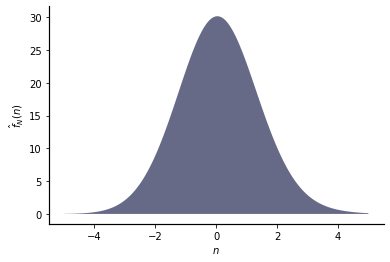

In [18]:
%matplotlib inline
x = np.linspace(-5,5, 1000)
density=np.zeros(x.size)
for xi in Nvals:
    ## Create new Normal RVs centered on the observation
    Ni=stats.norm(xi) 
    ## Use the density of the RV as the shape instead of a block:
    density+=Ni.pdf(x) 
    
plt.fill_between(x,density);
plt.xlabel('$n$');
plt.ylabel('$\hat{f}_N(n)$');

This looks a lot like our density, even though we only had 100 observations! 

The shape we use to build this new density estimate is called a *kernel*. This approach is called *kernel density estimation (KDE)*. When the Normal pdf shape is used for the kernel, it is typically called a **Gaussian kernel**.

However things are not quite as good as they seem:

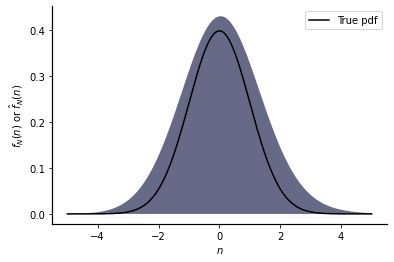

In [19]:
x = np.linspace(-5,5, 1000)
density=np.zeros(x.size)
for xi in Nvals:
    ## Create new Gaussian RVs centered on the observation
    Ni=stats.norm(xi) 
    ## Use the density of the RV as the shape instead of a block:
    density+=Ni.pdf(x) 
    
plt.fill_between(x,density/70) #Scale to make amplitudes match
plt.plot(x, N.pdf(x),'k', label='True pdf')
plt.legend();
plt.xlabel('$n$');
plt.ylabel('$f_N(n)$ or $\hat{f}_N(n)$');

The estimated pdf is much wider than the true pdf. This could be for various reasons. Is it because we only used 100 observations? Let's try 1000 observations:

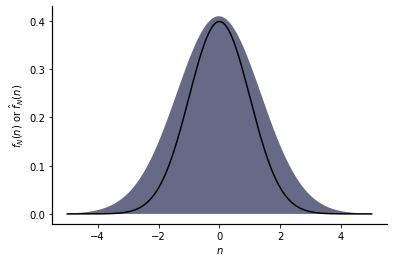

In [20]:
Nvals2=N.rvs(size=1000)
x = np.linspace(-5,5, 1000)
density=np.zeros(x.size)
for xi in Nvals2:
    ## Create new Gaussian RVs centered on the observation
    Ni=stats.norm(xi) 
    ## Use the density of the RV as the shape instead of a block:
    density+=Ni.pdf(x) 
    
plt.fill_between(x,density/700) #Scale to make amplitudes match
plt.plot(x, N.pdf(x),'k')
plt.xlabel('$n$');
plt.ylabel('$f_N(n)$ or $\hat{f}_N(n)$');

The esimated density is still wider than the true density. The problem is that the kernel we are using is too wide to capture the true density -- it provides too much smoothing. Let's try a narrower kernel:

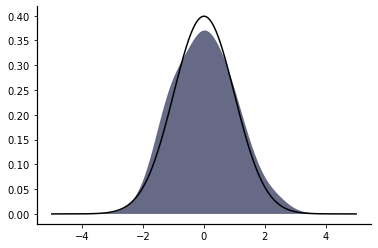

In [21]:
Nvals2=N.rvs(size=1000)
x = np.linspace(-5,5, 1000)
density=np.zeros(x.size)
for xi in Nvals2:
    ## Create new Normal RVs centered on the observation
    Ni=stats.norm(xi,scale=0.4) 
    ## Use the density of the RV as the shape instead of a block:
    density+=Ni.pdf(x) 
    
plt.fill_between(x,density/950) #Scale to make amplitudes match
plt.plot(x, N.pdf(x),'k');

That is pretty close. So one important issue in KDE is choosing the appropriate kernel. **The Gaussian kernel is most common, but the standard deviation of the kernel must be chosen appropriately**.

Let's try some other standard deviations:



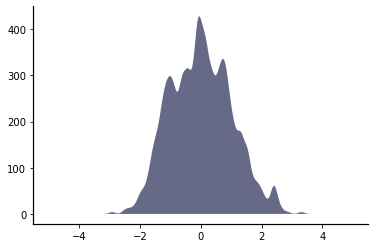

In [22]:
x = np.linspace(-5,5, 1000)
density=np.zeros(x.size)
for xi in Nvals2:
    ## Create new Gaussian RVs centered on the observation
    Ni=stats.norm(xi,scale=0.1) 
    ## Use the density of the RV as the shape instead of a block:
    density+=Ni.pdf(x) 
    
plt.fill_between(x,density);

With a standard deviation of 0.1, the empirical density is not a good approximation of the true density -- there is not enough smoothing for the amount of data that we have.

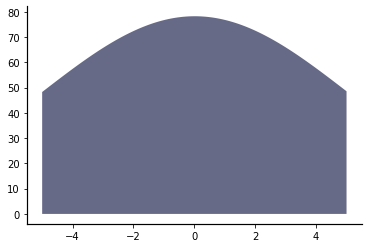

In [23]:
x = np.linspace(-5,5, 1000)
density=np.zeros(x.size)
for xi in Nvals2:
    ## Create new Gaussian RVs centered on the observation
    Ni=stats.norm(xi,scale=5) 
    ## Use the density of the RV as the shape instead of a block:
    density+=Ni.pdf(x) 
    
plt.fill_between(x,density);

With a kernel standard deviation of 5, the empirical pdf is spread way too wide. 

Let's try an exponential kernel:

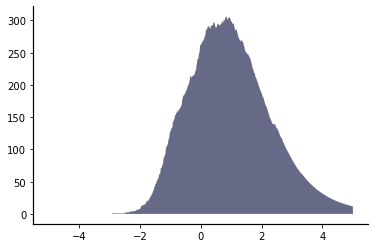

In [24]:
x = np.linspace(-5,5, 1000)
density=np.zeros(x.size)
for xi in Nvals2:
    ## Create new exponential RVs centered on the observation
    Ei=stats.expon(xi) 
    ## Use the density of the RV as the shape instead of a block:
    density+=Ei.pdf(x) 
    
plt.fill_between(x,density);

It is not that bad, but way worse than our Gaussian kernel.


Now consider applying KDE to the observations from the Exponential random variable:

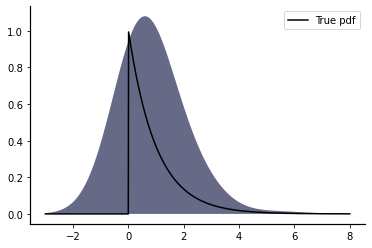

In [25]:
x = np.linspace(-3,8, 1000)
density=np.zeros(x.size)
for xi in Evals:
    Ni=stats.norm(xi)
    density+=Ni.pdf(x)
plt.fill_between(x,density/30)
plt.plot(x, E.pdf(x),'k', label='True pdf');
plt.legend();

Hmmm.... That doesn't look like an exponential density. Our random variable is non-negative!!!

We could do a little better if we make our shape more narrow:

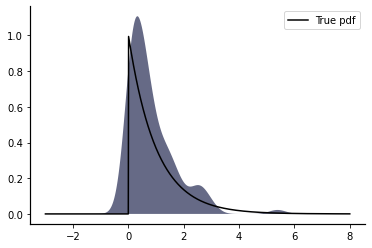

In [26]:
x = np.linspace(-3,8, 1000)
density=np.zeros(x.size)
for xi in Evals:
    Ni=stats.norm(xi,scale=0.3)
    density+=Ni.pdf(x)
plt.fill_between(x,density/60)
plt.plot(x, E.pdf(x),'k', label='True pdf');
plt.legend();

Finally, let's try our exponential kernel:

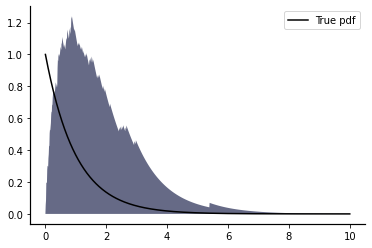

In [27]:
x = np.linspace(0, 10, 1000)
density=np.zeros(x.size)
for xi in Evals:
    ## Create new exponential RVs centered on the observation
    Ei=stats.expon(xi) 
    ## Use the density of the RV as the shape instead of a block:
    density+=Ei.pdf(x) 
    
plt.fill_between(x,density/35)
plt.plot(x, E.pdf(x),'k', label='True pdf')
plt.legend();

Well, it is non-negative, but still not a good approximation of the true density. Let's try one more time with a narrower kernel:

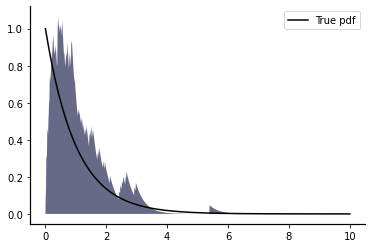

In [28]:
x = np.linspace(0, 10, 1000)
density=np.zeros(x.size)
for xi in Evals:
    ## Create new exponential RVs centered on the observation
    Ei=stats.expon(xi,scale=0.3) 
    ## Use the density of the RV as the shape instead of a block:
    density+=Ei.pdf(x) 
    
plt.fill_between(x,density/70)
plt.plot(x, E.pdf(x),'k', label='True pdf')
plt.legend();

It is very hard to get a good estimate because the Exponential pdf is **not a continuous function**.

In this book, we will apply KDE to continuous densities, and we will always use the Gaussian kernel.  However, we still need to choose the variance of the kernel.  Fortunately, there are techniques to automatically choose the variance of the Gaussian kernel. 

We will generally use scipy.stat's `stats.gaussian_kde()` method, which uses a heuristic to choose the variance of the Gaussian kernel (called the bandwidth). The method `stats.gaussian_kde()` returns a *function* that is an empirical pdf and that can be called just like the standard pdf method of SciPy.stats continuous random variables:


In [29]:
Nvals3=N.rvs(size=1000)

Nkde=stats.gaussian_kde(Nvals3)

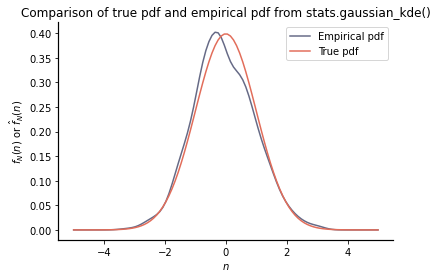

In [30]:
x=np.linspace(-5,5,100)
plt.plot(x,Nkde(x),  label='Empirical pdf')
plt.plot(x,N.pdf(x), label='True pdf')
plt.legend();
plt.xlabel('$n$');
plt.ylabel('$f_N(n)$ or $\hat{f}_N(n)$');
plt.title('Comparison of true pdf and empirical pdf from stats.gaussian_kde()');

## Discussion

Kernel density estimation is a better way to estimate the emprical pdf for random variables that have a pdf that is a continuous function. It provides smoothing via the use of a kernel, but the estimator depends on the choice of the kernel function and its parameter(s). The usual kernel is the Gaussian kernel, which is the same as a Normal pdf, and SciPy.stats provides a `gaussian_kde()` method that not only does all the hard work of KDE, but also chooses the standard deviation of the kernel automatically.